In [99]:
# /
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# IMG_SIZE = 120
# CNT = 20106


# def load_images(mno, sno):
#     cnt = 0
#     image = np.array([None, None], dtype='object')
#     for i in ('Dataset', 'Label'):
#         base_dir = f'd:\\projects\\notebooks\\data\\medical\\{i}\\'
#         fname = base_dir + f'Anonymized_{mno:04d}\\{sno:04d}.png'
        
#         if not os.path.isfile(fname):
#             continue
#         cnt += 1
#         frame = Image.open(fname)
#         frame = frame.resize((IMG_SIZE, IMG_SIZE))
#         frame.save(fname.replace('.png', '') + f'_{IMG_SIZE}.png')
#     return cnt

# cnt = 0
# for i in range(1, 1515):
#     for j in range(0, 20):
#         cnt += load_images(i, j)


AttributeError: 'int' object has no attribute 'shape'

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

IMG_SIZE = 120
CNT = 20106

def load_images():
    base_dir = 'd:\\projects\\notebooks\\data\\medical\\'
    images = np.empty([2, CNT, IMG_SIZE*IMG_SIZE])
    #images = np.empty([2, 1000, IMG_SIZE*IMG_SIZE])
    

    cnt = 0
    for mno in range(1, 1515):
    #for mno in range(1, 30):
        if (mno%100 == 0):
            print(mno, '...')
        for sno in range(0, 20):
            found = True
            for a, i in enumerate(('Dataset', 'Label')):
                fname = base_dir + f'{i}\\Anonymized_{mno:04d}\\{sno:04d}_{IMG_SIZE}.png'
                if not os.path.isfile(fname):                    
                    found = False
                    break
        
                frame = Image.open(fname)                
                images[a, cnt] = np.array(frame.getdata())
                if a == 0:
                    images[a, cnt] /= 255
                
            if found:
                cnt += 1
    print('image count', cnt)
    return images

im = load_images()

100 ...
200 ...


KeyboardInterrupt: 

In [19]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import tensorflow.keras
from keras import models
from keras import layers
# from tensorflow.keras.layers import LeakyReLU
import keras.backend as K

def and_loss(y_true, y_prod):
    s = y_true.dot(y_prod.T)/(T.normalize(y_true, axis=1)*T.normalize(y_prod, axis=1))
    return s.reshape(y_true.shape)

def step(x):
    return K.cast(K.greater(x, 0.5), dtype=K.floatx())


ce_w = 0.5
ce_d_w = 0.5
e = K.epsilon()
smooth = 1

def Combo_loss(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    d = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    y_pred_f = K.clip(y_pred_f, e, 1.0 - e)
    out = - (ce_w * y_true_f * K.log(y_pred_f)) + ((1 - ce_w) * (1.0 - y_true_f) * K.log(1.0 - y_pred_f))
    weighted_ce = K.mean(out, axis=-1)
    combo = (ce_d_w * weighted_ce) - ((1 - ce_d_w) * (1 - d))
    return combo


model = models.Sequential()
model.add(layers.Conv2D(4, kernel_size=(4, 4), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
#model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
#model.add(layers.Conv2D(4, kernel_size=(3, 3), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(5, 5)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(IMG_SIZE*IMG_SIZE, activation='relu'))
#model.compile(loss=ground_loss, optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss=and_loss, optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss=Combo_loss, optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

x_train = im[0, :14000].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = im[1, :14000]
x_val = im[0, 14000:].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = im[1, 14000:]

print(x_train.shape, y_train.shape)
history = model.fit(x_train, y_train, epochs=400, batch_size=200, verbose=1) #, validation_data=(x_val, y_val), verbose=1)

(14000, 120, 120, 1) (14000, 14400)
Epoch 1/400
14000/14000 [==============================] - 10s 743us/step - loss: 530760.5036 - acc: 0.0022
Epoch 2/400
14000/14000 [==============================] - 8s 546us/step - loss: 502582.2594 - acc: 0.0014
Epoch 3/400
14000/14000 [==============================] - 8s 547us/step - loss: 482209.0960 - acc: 0.0028
Epoch 4/400
14000/14000 [==============================] - 8s 546us/step - loss: 473213.6174 - acc: 0.0049
Epoch 5/400
14000/14000 [==============================] - 8s 546us/step - loss: 468095.0893 - acc: 0.0038
Epoch 6/400
14000/14000 [==============================] - 8s 545us/step - loss: 464777.1054 - acc: 0.0039
Epoch 7/400
14000/14000 [==============================] - 8s 545us/step - loss: 463015.3545 - acc: 0.0049
Epoch 8/400
14000/14000 [==============================] - 8s 544us/step - loss: 461486.3754 - acc: 0.0049
Epoch 9/400
14000/14000 [==============================] - 8s 544us/step - loss: 461286.5344 - acc: 0.0050


KeyboardInterrupt: 

In [21]:
# x_val = im[0, 14000:].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# y_val = im[1, 14000:]
y = model.predict(x_train[:100])
y = y.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# y[y>=0.5] = 1
# y[y<0.5] = 0

In [6]:
def show_image(im, n):
    plt.imshow(im[0, n].reshape(IMG_SIZE, IMG_SIZE), alpha=0.5)
    plt.imshow(im[1, n].reshape(IMG_SIZE, IMG_SIZE), alpha=0.5)
    plt.show()
    
def show_image2(im, im2):
    plt.imshow(im.reshape(IMG_SIZE, IMG_SIZE), alpha=1)
    plt.imshow(im2.reshape(IMG_SIZE, IMG_SIZE), alpha=0.5)
    plt.show()
    
def show_image3(im, im2, im3):
    plt.imshow(im.reshape(IMG_SIZE, IMG_SIZE), alpha=1)
    plt.imshow(im2.reshape(IMG_SIZE, IMG_SIZE), alpha=0.3)
    plt.imshow(im3.reshape(IMG_SIZE, IMG_SIZE), alpha=0.2)
    plt.show()

# for i in range(200, 400):
#     print(f'***** {i} *****')
#     show_image(im, i)

y.shape

(10, 120, 120, 1)

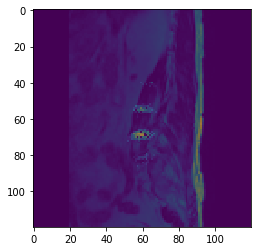

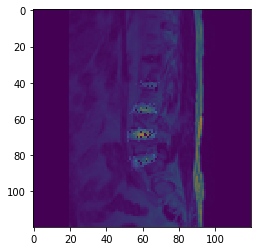

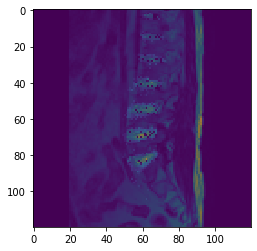

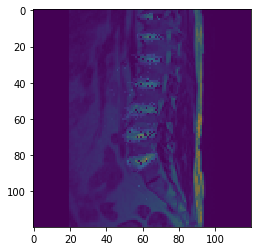

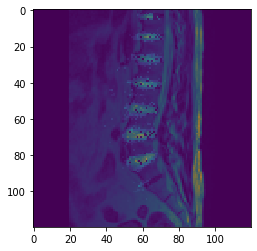

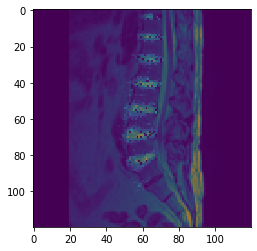

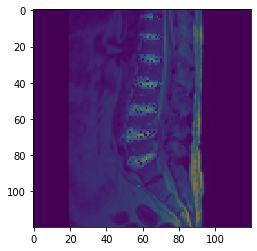

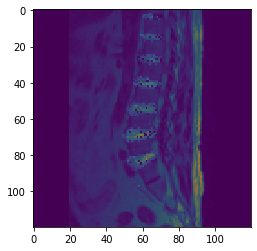

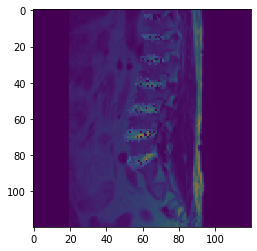

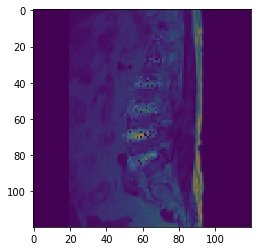

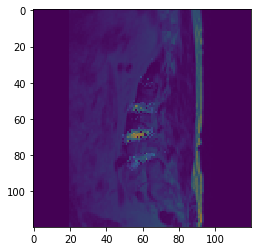

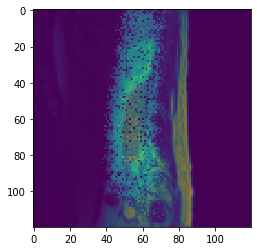

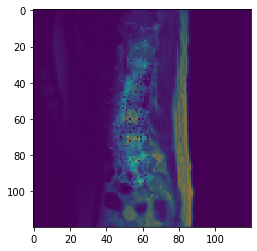

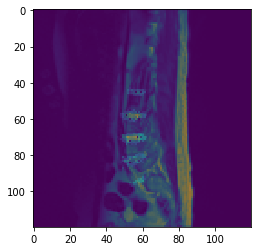

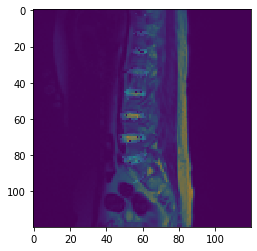

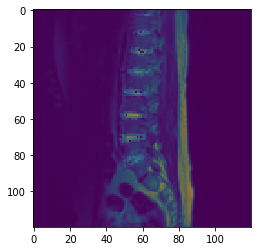

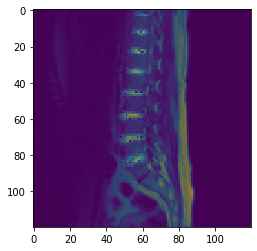

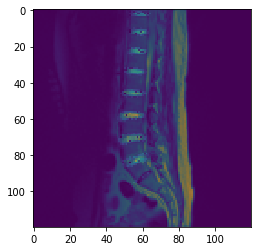

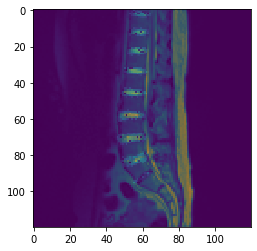

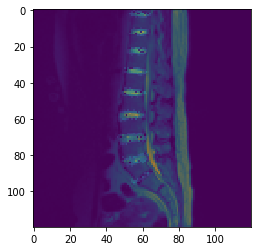

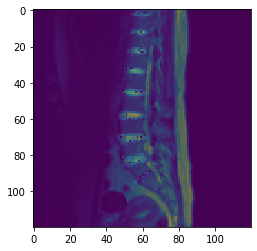

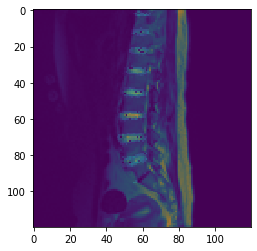

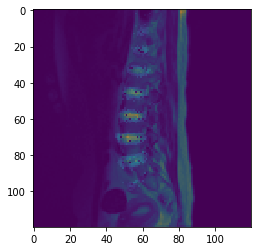

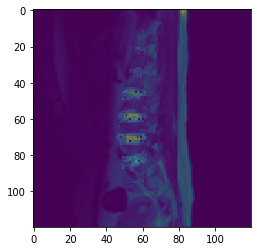

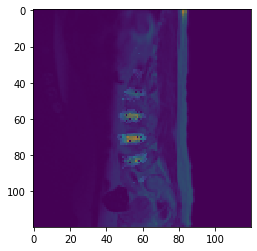

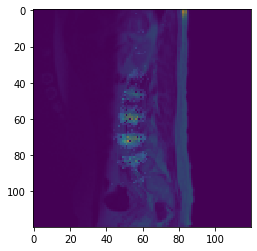

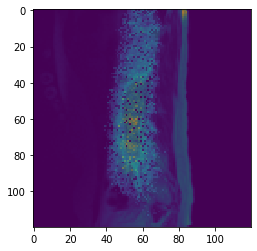

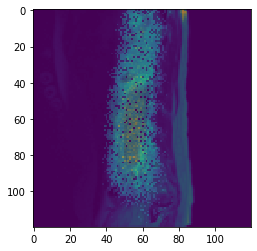

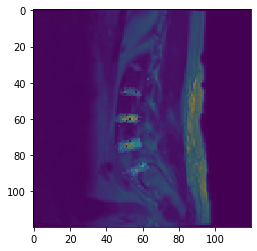

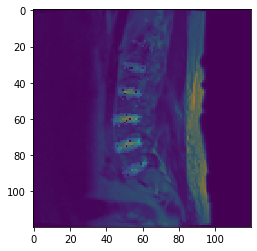

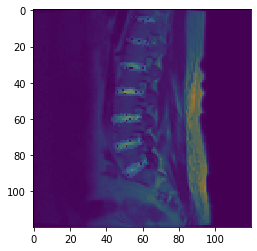

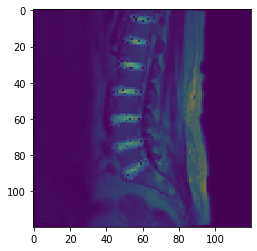

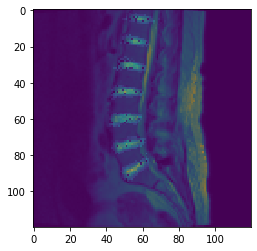

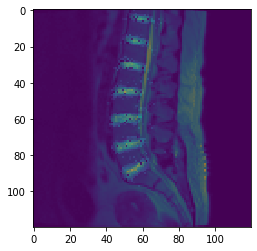

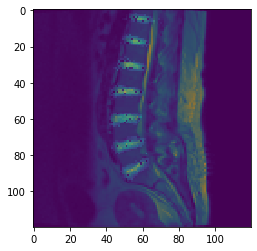

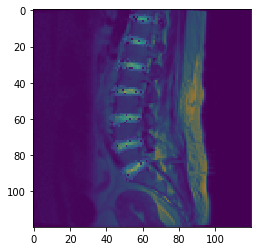

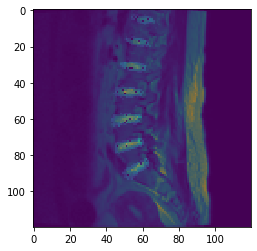

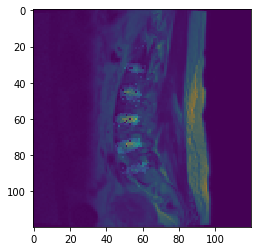

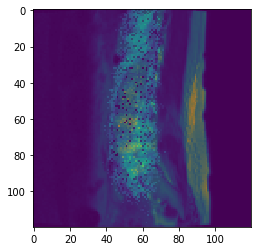

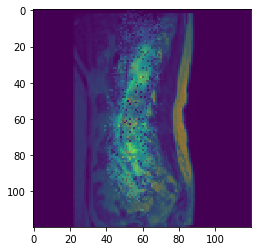

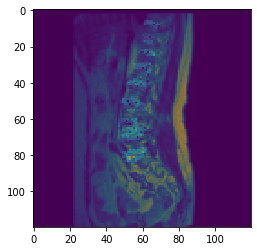

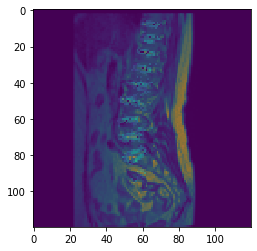

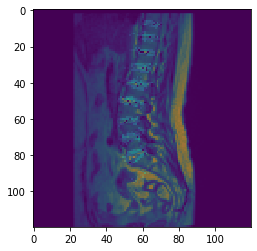

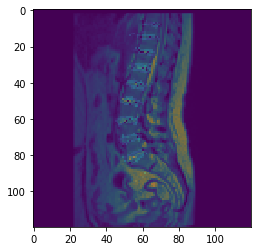

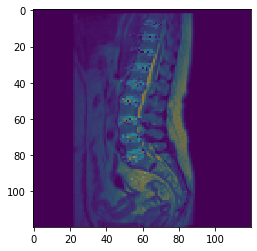

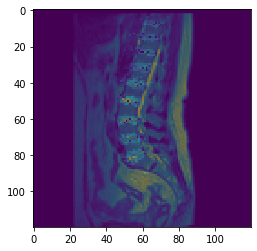

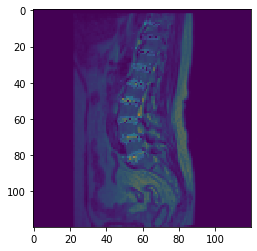

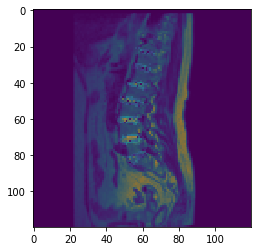

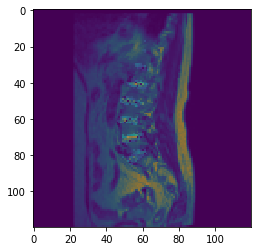

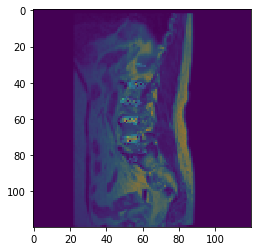

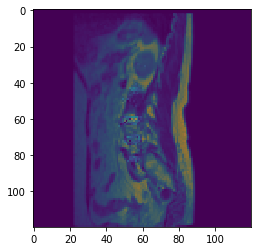

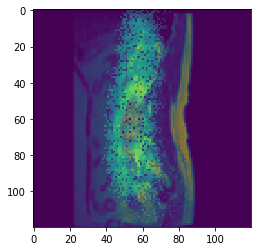

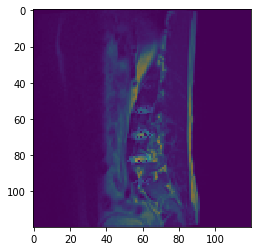

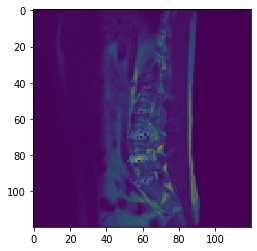

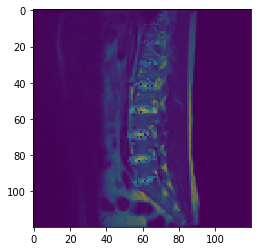

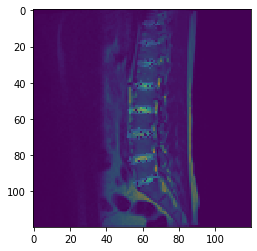

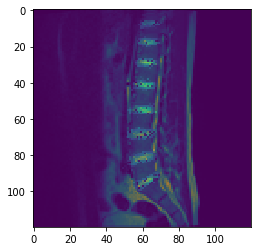

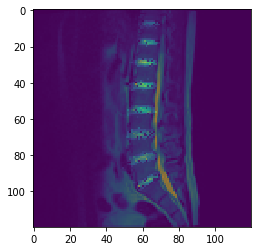

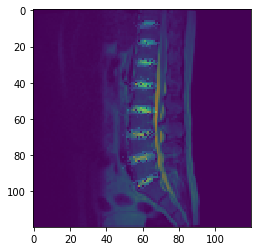

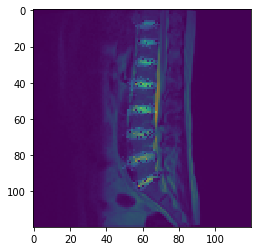

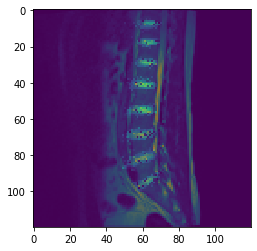

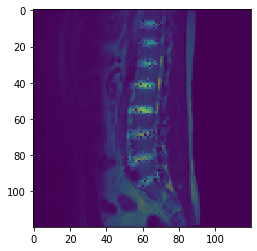

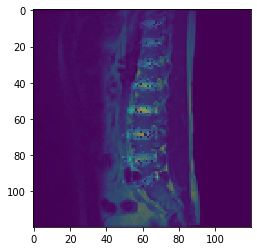

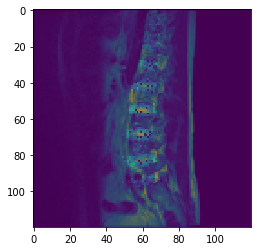

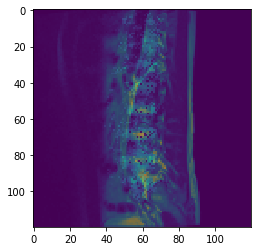

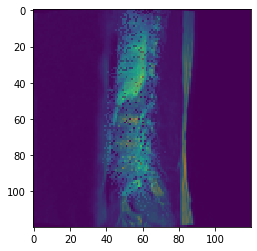

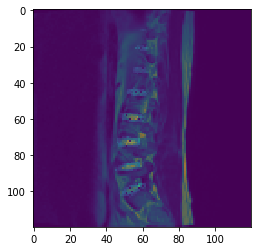

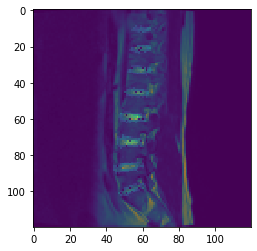

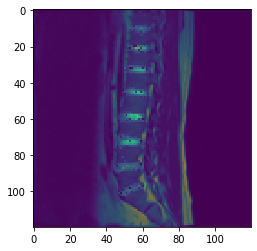

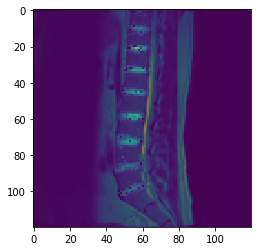

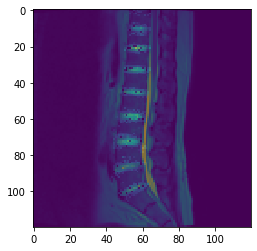

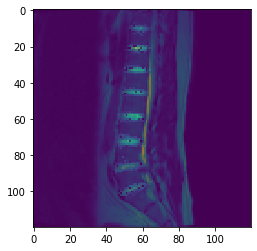

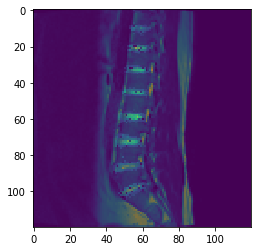

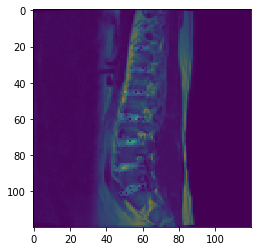

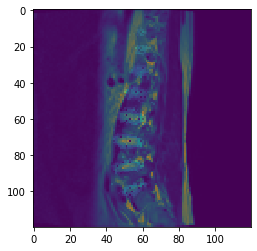

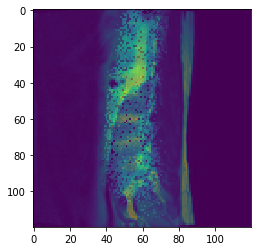

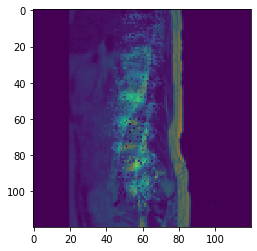

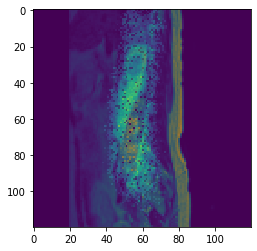

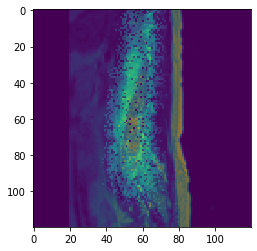

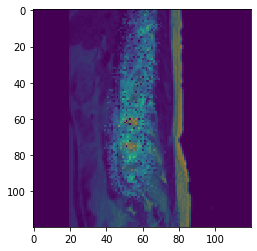

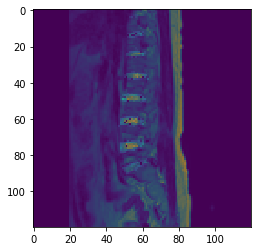

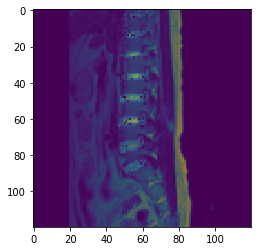

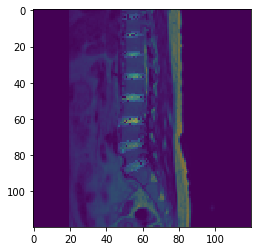

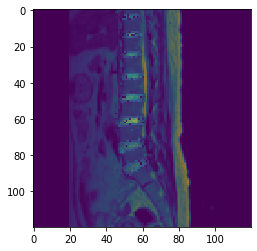

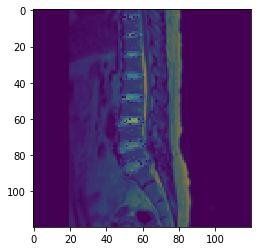

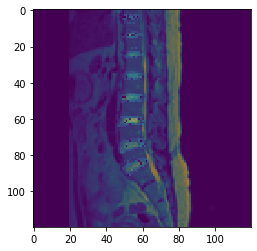

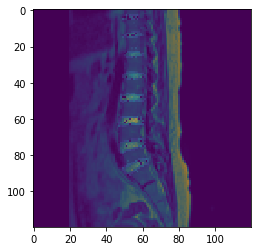

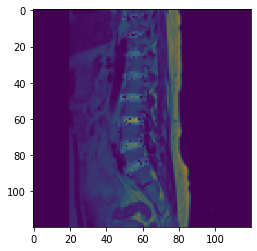

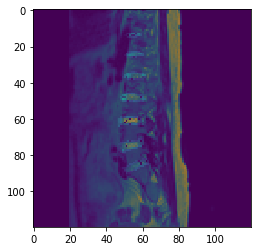

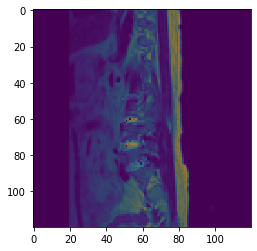

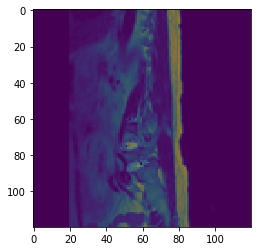

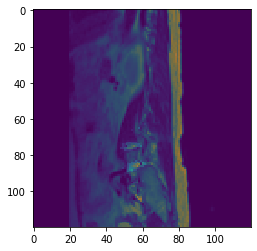

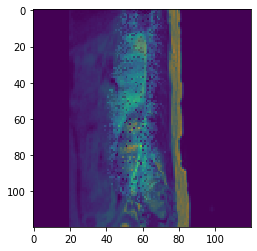

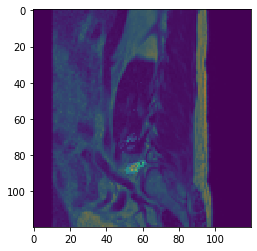

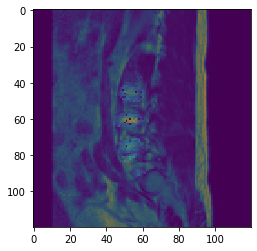

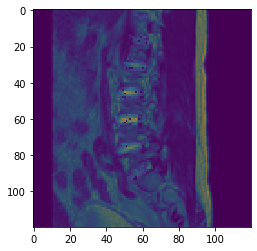

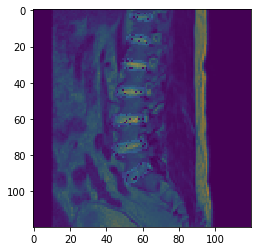

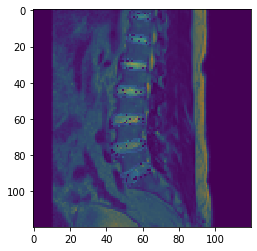

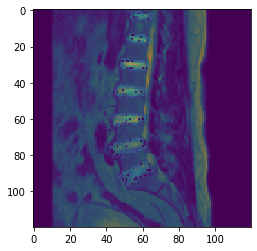

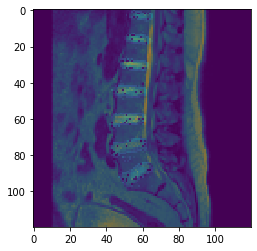

In [22]:
for i in range(0, 100):
    show_image2(x_train[i], y[i])
    #show_image3(x_val[i], y[i], y_val[i])
